## Australian Weather Data

### Predicting whether it will rain tomorrow or not. Data was downloaded from Kaggle https://www.kaggle.com/jsphyg/weather-dataset-rattle-package 

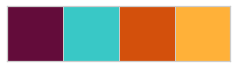

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style ='white')
sns.set(style='whitegrid',
       color_codes = True)
customPalette = ['#630C3A', '#39C8C6', '#D3500C', '#FFB139']
sns.set_palette(customPalette)
sns.palplot(customPalette)


In [2]:
weather_df = pd.read_csv('weatherAUS.csv')
weather_df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [3]:
weather_df.describe(include = 'all')

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
count,145460,145460,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135134,135197.000000,134894,...,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000,142199,142193
unique,3436,49,NaN,NaN,NaN,NaN,NaN,16,NaN,16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2
top,2016-05-29,Canberra,NaN,NaN,NaN,NaN,NaN,W,NaN,N,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,No
freq,49,3436,NaN,NaN,NaN,NaN,NaN,9915,NaN,11758,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,110319,110316
mean,NaN,NaN,12.194034,23.221348,2.360918,5.468232,7.611178,NaN,40.035230,NaN,...,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339,NaN,NaN
std,NaN,NaN,6.398495,7.119049,8.478060,4.193704,3.785483,NaN,13.607062,NaN,...,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665,NaN,NaN
min,NaN,NaN,-8.500000,-4.800000,0.000000,0.000000,0.000000,NaN,6.000000,NaN,...,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000,NaN,NaN
25%,NaN,NaN,7.600000,17.900000,0.000000,2.600000,4.800000,NaN,31.000000,NaN,...,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000,NaN,NaN
50%,NaN,NaN,12.000000,22.600000,0.000000,4.800000,8.400000,NaN,39.000000,NaN,...,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000,NaN,NaN
75%,NaN,NaN,16.900000,28.200000,0.800000,7.400000,10.600000,NaN,48.000000,NaN,...,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000,NaN,NaN


### Change Data Types

In [4]:
## Change Date to Date_Time 

In [5]:
weather_df['Date'] = pd.to_datetime(weather_df['Date'].str.strip(), format='%Y/%m/%d')


In [6]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           145460 non-null  datetime64[ns]
 1   Location       145460 non-null  object        
 2   MinTemp        143975 non-null  float64       
 3   MaxTemp        144199 non-null  float64       
 4   Rainfall       142199 non-null  float64       
 5   Evaporation    82670 non-null   float64       
 6   Sunshine       75625 non-null   float64       
 7   WindGustDir    135134 non-null  object        
 8   WindGustSpeed  135197 non-null  float64       
 9   WindDir9am     134894 non-null  object        
 10  WindDir3pm     141232 non-null  object        
 11  WindSpeed9am   143693 non-null  float64       
 12  WindSpeed3pm   142398 non-null  float64       
 13  Humidity9am    142806 non-null  float64       
 14  Humidity3pm    140953 non-null  float64       
 15  

### Dropping Nulls

In [7]:
weather_df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [8]:
## Looks like 3000 rows are missing for the predicting variable. Dropping rows.

In [9]:
weather_df = weather_df.dropna(subset = ['RainTomorrow']) 

In [10]:
## Checking for outliers and replacing nulls with average from the location  

In [11]:
weather_df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,141556.000000,141871.000000,140787.000000,81350.000000,74377.000000,132923.000000,140845.000000,139563.000000,140419.000000,138583.000000,128179.000000,128212.000000,88536.000000,85099.000000,141289.000000,139467.000000
mean,12.186400,23.226784,2.349974,5.469824,7.624853,39.984292,14.001988,18.637576,68.843810,51.482606,1017.653758,1015.258204,4.437189,4.503167,16.987509,21.687235
std,6.403283,7.117618,8.465173,4.188537,3.781525,13.588801,8.893337,8.803345,19.051293,20.797772,7.105476,7.036677,2.887016,2.720633,6.492838,6.937594
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000
25%,7.600000,17.900000,0.000000,2.600000,4.900000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.900000,1010.400000,1.000000,2.000000,12.300000,16.600000
50%,12.000000,22.600000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000
75%,16.800000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.600000,26.400000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000


In [12]:
Numerical = []
for column in weather_df.columns:
    if weather_df [column].dtype != 'O':
        Numerical.append(column)


Numerical.remove('Date')
Numerical

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm']

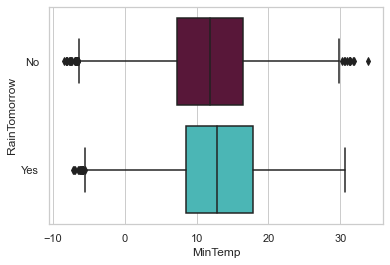

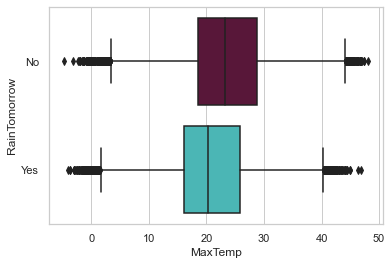

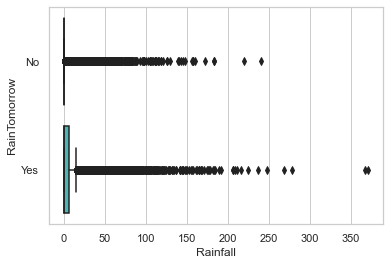

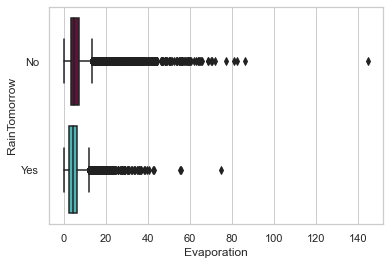

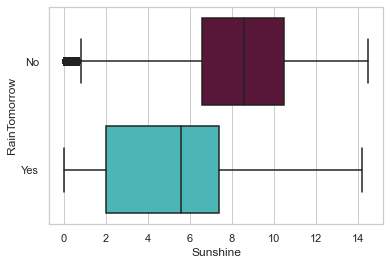

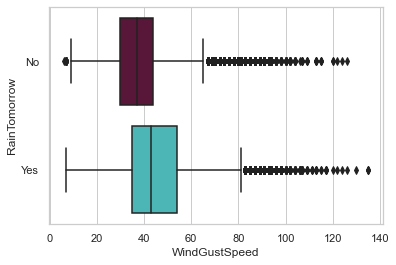

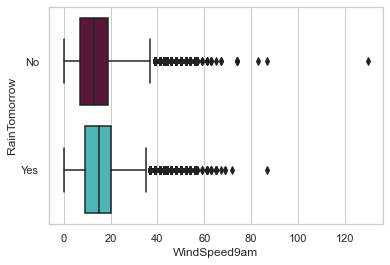

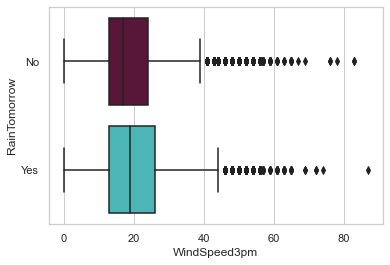

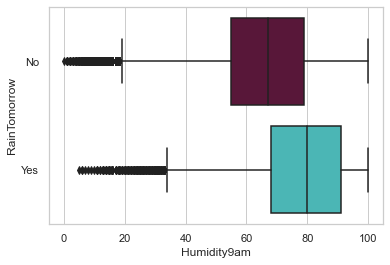

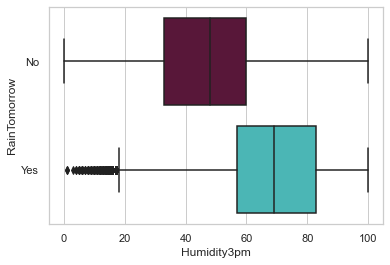

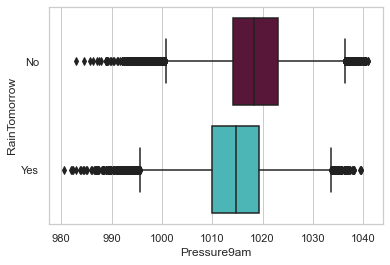

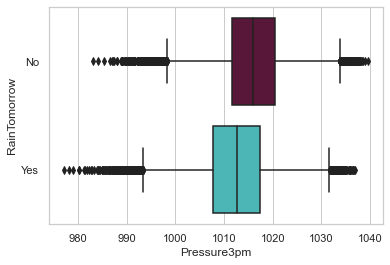

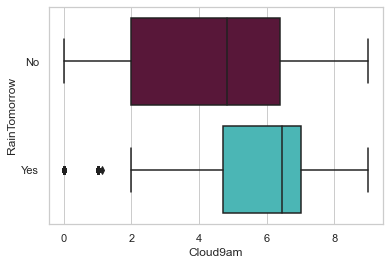

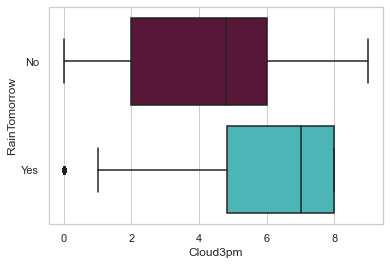

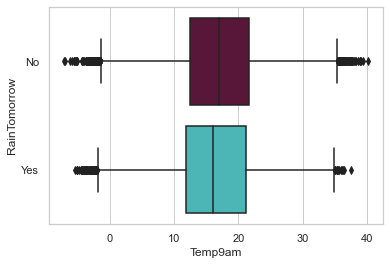

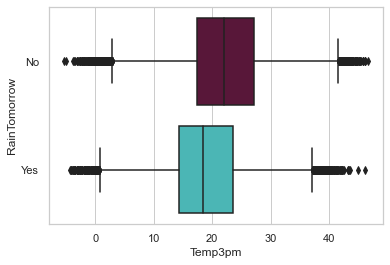

In [155]:
for var in Numerical:
    sns.boxplot(x = weather_df[var] )
    plt.show()



In [14]:
## Not too many outliers, replacing nulls with average values grouped by location 

In [15]:
for var in Numerical:
    weather_df [var] = weather_df [var].fillna(weather_df.groupby('Location')[var].transform('mean'))

In [16]:
weather_df.isnull().sum() ## There are still some nulls. 

Date                 0
Location             0
MinTemp              0
MaxTemp              0
Rainfall             0
Evaporation      44261
Sunshine         52071
WindGustDir       9330
WindGustSpeed     5971
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am         0
WindSpeed3pm         0
Humidity9am          0
Humidity3pm          0
Pressure9am      11781
Pressure3pm      11781
Cloud9am         34034
Cloud3pm         34034
Temp9am              0
Temp3pm              0
RainToday         1406
RainTomorrow         0
dtype: int64

In [17]:
mask_Eva = weather_df[weather_df['Evaporation'].isna()]
mask_Eva.shape

(44261, 23)

In [18]:
mask_Eva['Location'].value_counts()  ## Lets look into each one of these cities

Ballarat         3028
Albury           3011
Tuggeranong      2998
Wollongong       2983
GoldCoast        2980
Penrith          2964
SalmonGums       2955
Newcastle        2955
Witchcliffe      2952
NorahHead        2929
BadgerysCreek    2928
MountGinini      2907
Walpole          2819
PearceRAAF       2762
Nhil             1569
Uluru            1521
Name: Location, dtype: int64

In [19]:
mask_Alb = weather_df[(weather_df['Location'] == 'Albury')] ## Looks like some cities don't have some values at all
mask_Alb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3011 entries, 0 to 3039
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           3011 non-null   datetime64[ns]
 1   Location       3011 non-null   object        
 2   MinTemp        3011 non-null   float64       
 3   MaxTemp        3011 non-null   float64       
 4   Rainfall       3011 non-null   float64       
 5   Evaporation    0 non-null      float64       
 6   Sunshine       0 non-null      float64       
 7   WindGustDir    3001 non-null   object        
 8   WindGustSpeed  3011 non-null   float64       
 9   WindDir9am     2494 non-null   object        
 10  WindDir3pm     2969 non-null   object        
 11  WindSpeed9am   3011 non-null   float64       
 12  WindSpeed3pm   3011 non-null   float64       
 13  Humidity9am    3011 non-null   float64       
 14  Humidity3pm    3011 non-null   float64       
 15  Pressure9am    3011 n

 ### Replacing Nulls from near by locations. Mapped these locations using tableau. Please review the link below for mapped locations-
 ### https://public.tableau.com/views/MetisClassification/Sheet1?:language=en-US&:display_count=n&:origin=viz_share_link 

In [20]:
mask_wa = weather_df[(weather_df['Location'] == 'WaggaWagga')] ## Lets replace values from the closest city
mask_wa.head()
    

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
36529,2009-01-01,WaggaWagga,9.9,28.4,0.0,9.8,13.5,WNW,59.0,NW,...,37.0,24.0,1005.2,1003.5,1.0,1.0,20.8,27.0,No,No
36530,2009-01-02,WaggaWagga,8.9,25.3,0.0,14.8,13.7,WSW,48.0,SW,...,37.0,10.0,1013.9,1012.9,1.0,0.0,14.7,23.2,No,No
36531,2009-01-03,WaggaWagga,11.0,30.7,0.0,9.8,13.7,NE,39.0,ENE,...,43.0,18.0,1017.8,1014.3,0.0,1.0,18.9,28.0,No,No
36532,2009-01-04,WaggaWagga,14.7,35.2,0.0,9.4,12.1,N,39.0,NE,...,46.0,19.0,1014.8,1010.6,1.0,4.0,24.7,33.7,No,No
36533,2009-01-05,WaggaWagga,11.8,36.5,0.0,11.6,13.4,W,43.0,NNE,...,23.0,5.0,1013.1,1009.8,1.0,1.0,23.6,34.6,No,No


In [21]:
mask_wa = mask_wa[['Date', 'Evaporation', 'Sunshine']]

In [22]:
mask_merged = pd.merge(mask_Alb, 
                     mask_wa, 
                     on ='Date', 
                     how ='left')

In [23]:
mask_merged.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation_x,Sunshine_x,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Evaporation_y,Sunshine_y
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,1007.7,1007.1,8.000000,5.419788,16.9,21.8,No,No,NaN,NaN
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,1010.6,1007.8,6.392356,5.419788,17.2,24.3,No,No,NaN,NaN
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,1007.6,1008.7,6.392356,2.000000,21.0,23.2,No,No,NaN,NaN
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,1017.6,1012.8,6.392356,5.419788,18.1,26.5,No,No,NaN,NaN
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,1010.8,1006.0,7.000000,8.000000,17.8,29.7,No,No,NaN,NaN


In [24]:
mask_merged = mask_merged.drop(['Evaporation_x', 'Sunshine_x'], axis = 1)

In [25]:
mask_merged.rename(columns={"Evaporation_y": "Evaporation", "Sunshine_y": "Sunshine"}, inplace = True)

In [26]:
mask_merged.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'WindGustDir',
       'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
       'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm',
       'RainToday', 'RainTomorrow', 'Evaporation', 'Sunshine'],
      dtype='object')

In [27]:
mask_merged = mask_merged[['Date', 'Location', 'MinTemp', 'MaxTemp', 
                          'Rainfall', 'Evaporation', 'Sunshine','WindGustDir', 
                          'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am',
                          'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
                          'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow']]

In [28]:
weather_df = weather_df [weather_df ["Location"] != 'Albury']


In [29]:
weather_df = weather_df.append(mask_merged)


In [30]:
mask = weather_df[(weather_df['Location'] == 'Albury')] ## Values replaced with closest city
mask.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,3011.000000,3011.000000,3011.000000,2948.000000,2948.000000,3011.000000,3011.000000,3011.000000,3011.000000,3011.000000,3011.000000,3011.000000,3011.000000,3011.000000,3011.000000,3011.000000
mean,9.520899,22.630963,1.925710,5.161617,8.192657,32.953016,8.221816,14.378828,74.108081,47.884935,1018.367253,1015.755504,6.392356,5.419788,14.348620,21.364716
std,6.055983,7.795433,6.228257,4.104997,3.727625,13.339950,6.740049,7.188374,17.426103,19.819855,7.361457,7.107066,1.557923,1.938133,6.368901,7.520477
min,-2.800000,6.800000,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,18.000000,7.000000,989.800000,982.900000,0.000000,1.000000,0.300000,6.400000
25%,4.700000,15.800000,0.000000,2.000000,6.200000,24.000000,4.000000,9.000000,61.000000,33.000000,1013.400000,1010.700000,6.392356,5.419788,9.200000,14.900000
50%,9.100000,21.900000,0.000000,4.200000,8.400000,31.000000,7.000000,13.000000,76.000000,47.000000,1018.400000,1015.600000,6.392356,5.419788,14.100000,20.600000
75%,14.300000,28.900000,0.400000,7.800000,11.000000,41.000000,11.000000,19.000000,88.000000,60.500000,1023.300000,1020.500000,7.000000,6.000000,19.300000,27.200000
max,28.300000,44.800000,104.200000,39.400000,14.100000,107.000000,37.000000,50.000000,100.000000,100.000000,1039.900000,1036.100000,8.000000,8.000000,34.500000,43.400000


In [31]:
remaining_nulls = weather_df[weather_df['Evaporation'].isna()]
remaining_nulls['Location'].value_counts()

Ballarat         3028
Tuggeranong      2998
Wollongong       2983
GoldCoast        2980
Penrith          2964
SalmonGums       2955
Newcastle        2955
Witchcliffe      2952
NorahHead        2929
BadgerysCreek    2928
MountGinini      2907
Walpole          2819
PearceRAAF       2762
Nhil             1569
Uluru            1521
Albury             63
Name: Location, dtype: int64

### Replacing Nulls for Ballarat from Melbourne

In [32]:
mask_Bal = weather_df[(weather_df['Location'] == 'Ballarat')] 
mask_Bal.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,3028.000000,3028.000000,3028.00000,0.0,0.0,3028.000000,3028.000000,3028.000000,3028.000000,3028.000000,3028.000000,3028.000000,3028.000000,3028.000000,3028.000000,3028.000000
mean,7.355302,18.274794,1.68883,NaN,NaN,44.978695,19.978477,22.780496,81.816428,59.045665,1017.855293,1016.274967,5.797101,6.286865,11.664125,16.776447
std,4.715815,7.190079,4.66672,NaN,NaN,12.927291,9.437213,9.233674,18.637029,22.579374,7.581037,7.420113,2.381221,1.975610,5.361446,6.997681
min,-5.600000,4.600000,0.00000,NaN,NaN,13.000000,0.000000,0.000000,9.000000,6.000000,989.400000,987.300000,0.000000,0.000000,-1.000000,1.700000
25%,4.200000,12.300000,0.00000,NaN,NaN,37.000000,13.000000,17.000000,71.000000,42.000000,1012.900000,1011.475000,5.000000,6.286865,7.700000,11.000000
50%,7.000000,16.800000,0.00000,NaN,NaN,44.000000,20.000000,22.000000,86.000000,59.000000,1017.900000,1016.300000,6.000000,6.286865,10.800000,15.400000
75%,10.300000,23.300000,1.20000,NaN,NaN,52.000000,26.000000,28.000000,98.000000,75.000000,1023.000000,1021.300000,8.000000,8.000000,14.600000,21.500000
max,25.100000,44.100000,58.60000,NaN,NaN,115.000000,56.000000,65.000000,100.000000,100.000000,1039.500000,1036.300000,8.000000,8.000000,34.100000,43.100000


In [33]:
mask_Mel = weather_df[(weather_df['Location'] == 'Melbourne')] ## Lets replace values from the closest city


In [34]:
mask_Nhil = weather_df[(weather_df['Location'] == 'Nhil')] 
mask_Nhil.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,1569.000000,1569.000000,1569.000000,0.0,0.0,1569.000000,1569.000000,1569.000000,1569.000000,1569.000000,1569.000000,1569.000000,0.0,0.0,1569.000000,1569.000000
mean,8.992798,22.398407,0.932907,NaN,NaN,42.542438,16.443595,20.956023,73.038241,44.924793,1018.546335,1016.401402,NaN,NaN,13.377693,20.866348
std,5.108704,7.700793,3.243254,NaN,NaN,13.826432,7.999731,9.684499,20.056071,21.077165,7.543523,7.334483,NaN,NaN,5.666358,7.321608
min,-2.300000,8.600000,0.000000,NaN,NaN,13.000000,0.000000,2.000000,13.000000,7.000000,986.900000,982.600000,NaN,NaN,-0.200000,7.300000
25%,5.400000,15.900000,0.000000,NaN,NaN,33.000000,11.000000,13.000000,60.000000,28.000000,1013.500000,1011.500000,NaN,NaN,9.300000,14.700000
50%,8.400000,21.300000,0.000000,NaN,NaN,41.000000,17.000000,20.000000,76.000000,43.000000,1018.500000,1016.400000,NaN,NaN,12.700000,19.700000
75%,12.200000,27.800000,0.200000,NaN,NaN,50.000000,20.000000,26.000000,90.000000,59.000000,1023.600000,1021.300000,NaN,NaN,16.400000,25.600000
max,29.400000,45.300000,65.600000,NaN,NaN,120.000000,48.000000,65.000000,100.000000,100.000000,1038.500000,1036.300000,NaN,NaN,35.100000,43.200000


In [35]:
mask_Mel = mask_Mel[['Date', 'Evaporation', 'Sunshine']]

In [36]:
mask_Mel_Bal = pd.merge(mask_Bal, 
                     mask_Mel, 
                     on ='Date', 
                     how ='left')

In [37]:
mask_Mel_Bal = mask_Mel_Bal.drop(['Evaporation_x', 'Sunshine_x'], axis = 1)
mask_Mel_Bal.rename(columns={"Evaporation_y": "Evaporation", "Sunshine_y": "Sunshine"}, inplace = True)

In [38]:
mask_Mel_Bal = mask_Mel_Bal[['Date', 'Location', 'MinTemp', 'MaxTemp', 
                          'Rainfall', 'Evaporation', 'Sunshine','WindGustDir', 
                          'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am',
                          'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
                          'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow']]

In [39]:
weather_df = weather_df [weather_df ["Location"] != 'Ballarat']


In [40]:
weather_df = weather_df.append(mask_Mel_Bal)
weather_df.shape

(142193, 23)

### Replacing Nulls for Nhils from Melbourne

In [41]:
mask_Mel = weather_df[(weather_df['Location'] == 'Melbourne')]
mask_Mel = mask_Mel[['Date', 'Evaporation', 'Sunshine', 'Cloud3pm', 'Cloud9am']]

In [42]:
mask_Mel_Nhil = pd.merge(mask_Nhil, 
                     mask_Mel, 
                     on ='Date', 
                     how ='left')

In [43]:
mask_Mel_Nhil = mask_Mel_Nhil.drop(['Evaporation_x', 'Sunshine_x', 'Cloud3pm_x', 'Cloud9am_x'], axis = 1)
mask_Mel_Nhil.rename(columns={"Evaporation_y": "Evaporation", "Sunshine_y": "Sunshine", 'Cloud3pm_y': 'Cloud3pm' , 'Cloud9am_y': 'Cloud9am'}, inplace = True)

In [44]:
weather_df = weather_df [weather_df ["Location"] != 'Nhil']


In [45]:
weather_df = weather_df.append(mask_Mel_Nhil)
weather_df.shape

(142193, 23)

### Replacing Nulls for Bendigo from Melbourne

In [46]:
mask_Ben = weather_df[(weather_df['Location'] == 'Bendigo')] 
mask_Ben.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,3034.000000,3034.000000,3034.000000,3034.000000,0.0,3034.000000,3034.000000,3034.000000,3034.000000,3034.000000,3034.000000,3034.000000,3034.000000,3034.000000,3034.000000,3034.000000
mean,8.591065,21.616683,1.621452,3.851730,NaN,38.849283,12.934675,17.157374,70.543084,46.472140,1018.024272,1015.869521,4.396618,4.857080,13.844789,20.249885
std,5.698498,7.620235,5.184771,1.779435,NaN,12.049572,7.247203,7.557799,17.473334,20.472025,7.431247,7.267405,2.605466,2.307808,5.640393,7.337261
min,-4.000000,7.100000,0.000000,0.000000,NaN,13.000000,0.000000,0.000000,11.000000,3.000000,989.500000,988.600000,0.000000,0.000000,0.600000,5.000000
25%,4.300000,15.100000,0.000000,3.851730,NaN,31.000000,9.000000,11.000000,58.000000,31.000000,1013.000000,1011.100000,2.000000,3.000000,9.500000,14.100000
50%,8.200000,20.600000,0.000000,3.851730,NaN,38.849283,13.000000,17.000000,70.000000,45.000000,1018.024272,1015.869521,4.396618,4.857080,13.300000,19.300000
75%,12.500000,27.300000,0.400000,3.851730,NaN,46.000000,17.000000,22.000000,84.000000,60.000000,1023.100000,1020.700000,7.000000,7.000000,17.500000,25.600000
max,29.000000,45.400000,66.400000,15.400000,NaN,94.000000,52.000000,50.000000,100.000000,99.000000,1039.300000,1036.300000,8.000000,8.000000,34.400000,44.400000


In [47]:
mask_Mel = mask_Mel[['Date', 'Sunshine']]

In [48]:
mask_Mel_Ben = pd.merge(mask_Ben, 
                     mask_Mel, 
                     on ='Date', 
                     how ='left')

In [49]:
mask_Mel_Ben = mask_Mel_Ben.drop(['Sunshine_x'], axis = 1)
mask_Mel_Ben.rename(columns={"Sunshine_y": "Sunshine"}, inplace = True)

In [50]:
weather_df = weather_df [weather_df ["Location"] != 'Bendigo']


In [51]:
weather_df = weather_df.append(mask_Mel_Ben)
weather_df.shape

(142193, 23)

In [52]:
mask_tug = weather_df[(weather_df['Location'] == 'Tuggeranong')] 
mask_tug.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2998 entries, 49023 to 52061
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           2998 non-null   datetime64[ns]
 1   Location       2998 non-null   object        
 2   MinTemp        2998 non-null   float64       
 3   MaxTemp        2998 non-null   float64       
 4   Rainfall       2998 non-null   float64       
 5   Evaporation    0 non-null      float64       
 6   Sunshine       0 non-null      float64       
 7   WindGustDir    2985 non-null   object        
 8   WindGustSpeed  2998 non-null   float64       
 9   WindDir9am     2364 non-null   object        
 10  WindDir3pm     2954 non-null   object        
 11  WindSpeed9am   2998 non-null   float64       
 12  WindSpeed3pm   2998 non-null   float64       
 13  Humidity9am    2998 non-null   float64       
 14  Humidity3pm    2998 non-null   float64       
 15  Pressure9am    2

In [53]:
mask_Can = weather_df[(weather_df['Location'] == 'Canberra')] 
mask_Can = mask_Can[['Date', 'Evaporation', 'Sunshine', 'Cloud3pm', 'Cloud9am']]

In [54]:
mask_tug_Can = pd.merge(mask_tug, 
                     mask_Can, 
                     on ='Date', 
                     how ='left')

In [55]:
mask_tug_Can = mask_tug_Can.drop(['Evaporation_x', 'Sunshine_x', 'Cloud3pm_x', 'Cloud9am_x'], axis = 1)
mask_tug_Can.rename(columns={"Evaporation_y": "Evaporation", "Sunshine_y": "Sunshine", 'Cloud3pm_y': 'Cloud3pm' , 'Cloud9am_y': 'Cloud9am'}, inplace = True)

In [56]:
weather_df = weather_df [weather_df ["Location"] != 'Tuggeranong']


In [57]:
weather_df = weather_df.append(mask_tug_Can)
weather_df.shape

(142193, 23)

In [58]:
mask_Wol = weather_df[(weather_df['Location'] == 'Wollongong')] 
mask_Wol.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2983 entries, 42549 to 45586
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           2983 non-null   datetime64[ns]
 1   Location       2983 non-null   object        
 2   MinTemp        2983 non-null   float64       
 3   MaxTemp        2983 non-null   float64       
 4   Rainfall       2983 non-null   float64       
 5   Evaporation    0 non-null      float64       
 6   Sunshine       0 non-null      float64       
 7   WindGustDir    2973 non-null   object        
 8   WindGustSpeed  2983 non-null   float64       
 9   WindDir9am     2865 non-null   object        
 10  WindDir3pm     2954 non-null   object        
 11  WindSpeed9am   2983 non-null   float64       
 12  WindSpeed3pm   2983 non-null   float64       
 13  Humidity9am    2983 non-null   float64       
 14  Humidity3pm    2983 non-null   float64       
 15  Pressure9am    2

In [59]:
mask_Syd = weather_df[(weather_df['Location'] == 'Sydney')] 
mask_Syd = mask_Syd[['Date', 'Evaporation', 'Sunshine']]

In [60]:
mask_Syd_Wol = pd.merge(mask_Wol, 
                     mask_Syd, 
                     on ='Date', 
                     how ='left')

In [61]:
mask_Syd_Wol = mask_Syd_Wol.drop(['Evaporation_x', 'Sunshine_x'], axis = 1)
mask_Syd_Wol.rename(columns={"Evaporation_y": "Evaporation", "Sunshine_y": "Sunshine"}, inplace = True)

In [62]:
weather_df = weather_df [weather_df ["Location"] != 'Wollongong']


In [63]:
weather_df = weather_df.append(mask_Syd_Wol)
weather_df.shape

(142193, 23)

In [64]:
mask_Pen = weather_df[(weather_df['Location'] == 'Penrith')] 
mask_Pen.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2964 entries, 24128 to 27166
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           2964 non-null   datetime64[ns]
 1   Location       2964 non-null   object        
 2   MinTemp        2964 non-null   float64       
 3   MaxTemp        2964 non-null   float64       
 4   Rainfall       2964 non-null   float64       
 5   Evaporation    0 non-null      float64       
 6   Sunshine       0 non-null      float64       
 7   WindGustDir    2957 non-null   object        
 8   WindGustSpeed  2964 non-null   float64       
 9   WindDir9am     2432 non-null   object        
 10  WindDir3pm     2904 non-null   object        
 11  WindSpeed9am   2964 non-null   float64       
 12  WindSpeed3pm   2964 non-null   float64       
 13  Humidity9am    2964 non-null   float64       
 14  Humidity3pm    2964 non-null   float64       
 15  Pressure9am    0

In [65]:
mask_Syd = weather_df[(weather_df['Location'] == 'Sydney')] 
mask_Syd = mask_Syd[['Date', 'Evaporation', 'Sunshine', 'Pressure9am', 'Pressure3pm', 'Cloud3pm', 'Cloud9am']]

In [66]:
mask_Syd_Pen = pd.merge(mask_Pen, 
                     mask_Syd, 
                     on ='Date', 
                     how ='left')

In [67]:
mask_Syd_Pen = mask_Syd_Pen.drop(['Evaporation_x', 'Sunshine_x', 'Pressure9am_x', 'Pressure3pm_x', 'Cloud3pm_x', 'Cloud9am_x'], axis = 1)
mask_Syd_Pen.rename(columns={"Evaporation_y": "Evaporation", "Sunshine_y": "Sunshine", 'Pressure9am_y': 'Pressure9am', 'Cloud3pm_y':'Cloud3pm', 'Pressure3pm_y': 'Pressure3pm',"Cloud9am_y": 'Cloud9am' }, inplace = True)

In [68]:
weather_df = weather_df [weather_df ["Location"] != 'Penrith']

In [69]:
weather_df = weather_df.append(mask_Syd_Pen)
weather_df.shape

(142193, 23)

In [70]:
mask_Bad = weather_df[(weather_df['Location'] == 'BadgerysCreek')] 
mask_Bad.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2928 entries, 3040 to 6048
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           2928 non-null   datetime64[ns]
 1   Location       2928 non-null   object        
 2   MinTemp        2928 non-null   float64       
 3   MaxTemp        2928 non-null   float64       
 4   Rainfall       2928 non-null   float64       
 5   Evaporation    0 non-null      float64       
 6   Sunshine       0 non-null      float64       
 7   WindGustDir    2912 non-null   object        
 8   WindGustSpeed  2928 non-null   float64       
 9   WindDir9am     2533 non-null   object        
 10  WindDir3pm     2868 non-null   object        
 11  WindSpeed9am   2928 non-null   float64       
 12  WindSpeed3pm   2928 non-null   float64       
 13  Humidity9am    2928 non-null   float64       
 14  Humidity3pm    2928 non-null   float64       
 15  Pressure9am    292

In [71]:
mask_Syd = weather_df[(weather_df['Location'] == 'Sydney')] 
mask_Syd = mask_Syd[['Date', 'Evaporation', 'Sunshine', 'Cloud9am', 'Cloud3pm']]

In [72]:
mask_Syd_Bad = pd.merge(mask_Bad, 
                     mask_Syd, 
                     on ='Date', 
                     how ='left')

In [73]:
mask_Syd_Bad = mask_Syd_Bad.drop(['Evaporation_x', 'Sunshine_x', 'Cloud3pm_x', 'Cloud9am_x'], axis = 1)
mask_Syd_Bad.rename(columns={"Evaporation_y": "Evaporation", "Sunshine_y": "Sunshine", 'Cloud3pm_y':'Cloud3pm', "Cloud9am_y": 'Cloud9am' }, inplace = True)

In [74]:
weather_df = weather_df [weather_df ["Location"] != 'BadgerysCreek']


In [75]:
weather_df = weather_df.append(mask_Syd_Bad)
weather_df.shape

(142193, 23)

Newcastle ----> Syndey


In [76]:

mask_New = weather_df[(weather_df['Location'] == 'Newcastle')] 
mask_New.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2955 entries, 15076 to 18114
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           2955 non-null   datetime64[ns]
 1   Location       2955 non-null   object        
 2   MinTemp        2955 non-null   float64       
 3   MaxTemp        2955 non-null   float64       
 4   Rainfall       2955 non-null   float64       
 5   Evaporation    0 non-null      float64       
 6   Sunshine       0 non-null      float64       
 7   WindGustDir    0 non-null      object        
 8   WindGustSpeed  0 non-null      float64       
 9   WindDir9am     1601 non-null   object        
 10  WindDir3pm     1713 non-null   object        
 11  WindSpeed9am   2955 non-null   float64       
 12  WindSpeed3pm   2955 non-null   float64       
 13  Humidity9am    2955 non-null   float64       
 14  Humidity3pm    2955 non-null   float64       
 15  Pressure9am    0

In [77]:
mask_Syd = weather_df[(weather_df['Location'] == 'Sydney')] 
mask_Syd = mask_Syd[['Date', 'Evaporation', 'Sunshine', 'WindGustDir', 'WindGustSpeed', 'Pressure9am', 'Pressure3pm']]

In [78]:
mask_Syd_New = pd.merge(mask_New, 
                     mask_Syd, 
                     on ='Date', 
                     how ='left')

In [79]:
mask_Syd_New = mask_Syd_New.drop(['Evaporation_x', 'Sunshine_x', 'WindGustDir_x', 'WindGustSpeed_x', 'Pressure9am_x', 'Pressure3pm_x'], axis = 1)
mask_Syd_New.rename(columns={"Evaporation_y": "Evaporation", "Sunshine_y": "Sunshine", 'WindGustDir_y': 'WindGustDir', 'WindGustSpeed_y': 'WindGustSpeed', 'Pressure9am_y': 'Pressure9am' , 'Pressure3pm_y': 'Pressure3pm' }, inplace = True)

In [80]:
weather_df = weather_df [weather_df ["Location"] != 'Newcastle']

In [81]:
weather_df = weather_df.append(mask_Syd_New)
weather_df.shape

(142193, 23)

In [82]:
mask_Norah = weather_df[(weather_df['Location'] == 'NorahHead')] 
mask_Norah.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2929 entries, 18115 to 21118
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           2929 non-null   datetime64[ns]
 1   Location       2929 non-null   object        
 2   MinTemp        2929 non-null   float64       
 3   MaxTemp        2929 non-null   float64       
 4   Rainfall       2929 non-null   float64       
 5   Evaporation    0 non-null      float64       
 6   Sunshine       0 non-null      float64       
 7   WindGustDir    2925 non-null   object        
 8   WindGustSpeed  2929 non-null   float64       
 9   WindDir9am     2845 non-null   object        
 10  WindDir3pm     2900 non-null   object        
 11  WindSpeed9am   2929 non-null   float64       
 12  WindSpeed3pm   2929 non-null   float64       
 13  Humidity9am    2929 non-null   float64       
 14  Humidity3pm    2929 non-null   float64       
 15  Pressure9am    2

In [83]:
mask_Syd = weather_df[(weather_df['Location'] == 'Sydney')] 
mask_Syd = mask_Syd[['Date', 'Evaporation', 'Sunshine', 'Cloud9am', 'Cloud3pm']]

In [84]:
mask_Syd_Norah = pd.merge(mask_Norah, 
                     mask_Syd, 
                     on ='Date', 
                     how ='left')

In [85]:
mask_Syd_Norah = mask_Syd_Norah.drop(['Evaporation_x', 'Sunshine_x', 'Cloud3pm_x', 'Cloud9am_x'], axis = 1)
mask_Syd_Norah.rename(columns={"Evaporation_y": "Evaporation", "Sunshine_y": "Sunshine", 'Cloud3pm_y':'Cloud3pm', "Cloud9am_y": 'Cloud9am' }, inplace = True)

In [86]:
weather_df = weather_df [weather_df ["Location"] != 'NorahHead']

In [87]:
weather_df = weather_df.append(mask_Syd_Norah)
weather_df.shape

(142193, 23)

In [88]:
mask_Gold = weather_df[(weather_df['Location'] == 'GoldCoast')] 
mask_Gold.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2980 entries, 90240 to 93279
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           2980 non-null   datetime64[ns]
 1   Location       2980 non-null   object        
 2   MinTemp        2980 non-null   float64       
 3   MaxTemp        2980 non-null   float64       
 4   Rainfall       2980 non-null   float64       
 5   Evaporation    0 non-null      float64       
 6   Sunshine       0 non-null      float64       
 7   WindGustDir    2895 non-null   object        
 8   WindGustSpeed  2980 non-null   float64       
 9   WindDir9am     2921 non-null   object        
 10  WindDir3pm     2947 non-null   object        
 11  WindSpeed9am   2980 non-null   float64       
 12  WindSpeed3pm   2980 non-null   float64       
 13  Humidity9am    2980 non-null   float64       
 14  Humidity3pm    2980 non-null   float64       
 15  Pressure9am    2

In [89]:
mask_Bris = weather_df[(weather_df['Location'] == 'Brisbane')] 
mask_Bris = mask_Bris[['Date', 'Evaporation', 'Sunshine', 'Cloud9am', 'Cloud3pm']]

In [90]:
mask_Gold_Bris = pd.merge(mask_Gold, 
                     mask_Bris, 
                     on ='Date', 
                     how ='left')

In [91]:
mask_Gold_Bris = mask_Gold_Bris.drop(['Evaporation_x', 'Sunshine_x', 'Cloud3pm_x', 'Cloud9am_x'], axis = 1)
mask_Gold_Bris.rename(columns={"Evaporation_y": "Evaporation", "Sunshine_y": "Sunshine", 'Cloud3pm_y':'Cloud3pm', "Cloud9am_y": 'Cloud9am' }, inplace = True)

In [92]:
weather_df = weather_df [weather_df ["Location"] != 'GoldCoast']

In [93]:
weather_df = weather_df.append(mask_Gold_Bris)
weather_df.shape

(142193, 23)

In [94]:
mask_witch = weather_df[(weather_df['Location'] == 'Witchcliffe')] 
mask_witch.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2952 entries, 111611 to 114619
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           2952 non-null   datetime64[ns]
 1   Location       2952 non-null   object        
 2   MinTemp        2952 non-null   float64       
 3   MaxTemp        2952 non-null   float64       
 4   Rainfall       2952 non-null   float64       
 5   Evaporation    0 non-null      float64       
 6   Sunshine       0 non-null      float64       
 7   WindGustDir    2937 non-null   object        
 8   WindGustSpeed  2952 non-null   float64       
 9   WindDir9am     2705 non-null   object        
 10  WindDir3pm     2934 non-null   object        
 11  WindSpeed9am   2952 non-null   float64       
 12  WindSpeed3pm   2952 non-null   float64       
 13  Humidity9am    2952 non-null   float64       
 14  Humidity3pm    2952 non-null   float64       
 15  Pressure9am   

In [95]:
mask_Albany = weather_df[(weather_df['Location'] == 'Albany')] 
mask_Albany = mask_Albany[['Date', 'Evaporation', 'Sunshine', 'Cloud9am', 'Cloud3pm']]

In [96]:
mask_witch_Albany = pd.merge(mask_witch, 
                     mask_Albany, 
                     on ='Date', 
                     how ='left')

In [97]:
mask_witch_Albany = mask_witch_Albany.drop(['Evaporation_x', 'Sunshine_x', 'Cloud3pm_x', 'Cloud9am_x'], axis = 1)
mask_witch_Albany.rename(columns={"Evaporation_y": "Evaporation", "Sunshine_y": "Sunshine", 'Cloud3pm_y':'Cloud3pm', "Cloud9am_y": 'Cloud9am' }, inplace = True)

In [98]:
weather_df = weather_df [weather_df ["Location"] != 'Witchcliffe']

In [99]:
weather_df = weather_df.append(mask_witch_Albany)
weather_df.shape

(142193, 23)

In [100]:
mask_Albany = weather_df[(weather_df['Location'] == 'Albany')] 
mask_Albany.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3016 entries, 108571 to 111610
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           3016 non-null   datetime64[ns]
 1   Location       3016 non-null   object        
 2   MinTemp        3016 non-null   float64       
 3   MaxTemp        3016 non-null   float64       
 4   Rainfall       3016 non-null   float64       
 5   Evaporation    3016 non-null   float64       
 6   Sunshine       3016 non-null   float64       
 7   WindGustDir    0 non-null      object        
 8   WindGustSpeed  0 non-null      float64       
 9   WindDir9am     2772 non-null   object        
 10  WindDir3pm     2249 non-null   object        
 11  WindSpeed9am   3016 non-null   float64       
 12  WindSpeed3pm   3016 non-null   float64       
 13  Humidity9am    3016 non-null   float64       
 14  Humidity3pm    3016 non-null   float64       
 15  Pressure9am   

In [101]:
mask_witch = weather_df[(weather_df['Location'] == 'Albany')] 
 
mask_witch = mask_witch[['Date', 'WindGustDir', 'WindGustSpeed']]

In [102]:
mask_Alb_Wit = pd.merge(mask_Albany, 
                     mask_witch, 
                     on ='Date', 
                     how ='left')

In [103]:
mask_Alb_Wit = mask_Alb_Wit.drop(['WindGustDir_x', 'WindGustSpeed_x'], axis = 1)
mask_Alb_Wit.rename(columns={"WindGustDir_y": "WindGustDir", "WindGustSpeed_y": "WindGustSpeed" }, inplace = True)

In [104]:
weather_df = weather_df [weather_df ["Location"] != 'Albany']

In [105]:
weather_df = weather_df.append(mask_Alb_Wit)
weather_df.shape

(142193, 23)

In [106]:
mask_Wal = weather_df[(weather_df['Location'] == 'Walpole')] 
mask_Wal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2819 entries, 126832 to 129837
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           2819 non-null   datetime64[ns]
 1   Location       2819 non-null   object        
 2   MinTemp        2819 non-null   float64       
 3   MaxTemp        2819 non-null   float64       
 4   Rainfall       2819 non-null   float64       
 5   Evaporation    0 non-null      float64       
 6   Sunshine       0 non-null      float64       
 7   WindGustDir    2755 non-null   object        
 8   WindGustSpeed  2819 non-null   float64       
 9   WindDir9am     2575 non-null   object        
 10  WindDir3pm     2763 non-null   object        
 11  WindSpeed9am   2819 non-null   float64       
 12  WindSpeed3pm   2819 non-null   float64       
 13  Humidity9am    2819 non-null   float64       
 14  Humidity3pm    2819 non-null   float64       
 15  Pressure9am   

In [107]:
mask_Albany = weather_df[(weather_df['Location'] == 'Albany')] 
mask_Albany = mask_Albany[['Date', 'Evaporation', 'Sunshine', 'Cloud9am', 'Cloud3pm']]

In [108]:
mask_Wal_Albany = pd.merge(mask_Wal, 
                     mask_Albany, 
                     on ='Date', 
                     how ='left')

In [109]:
mask_Wal_Albany = mask_Wal_Albany.drop(['Evaporation_x', 'Sunshine_x', 'Cloud3pm_x', 'Cloud9am_x'], axis = 1)
mask_Wal_Albany.rename(columns={"Evaporation_y": "Evaporation", "Sunshine_y": "Sunshine", 'Cloud3pm_y':'Cloud3pm', "Cloud9am_y": 'Cloud9am' }, inplace = True)

In [110]:
weather_df = weather_df [weather_df ["Location"] != 'Walpole']

In [111]:
weather_df = weather_df.append(mask_Wal_Albany)
weather_df.shape

(142193, 23)

In [112]:
mask_Mt = weather_df[(weather_df['Location'] == 'MountGinini')] 
mask_Mt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2907 entries, 52062 to 55101
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           2907 non-null   datetime64[ns]
 1   Location       2907 non-null   object        
 2   MinTemp        2907 non-null   float64       
 3   MaxTemp        2907 non-null   float64       
 4   Rainfall       2907 non-null   float64       
 5   Evaporation    0 non-null      float64       
 6   Sunshine       0 non-null      float64       
 7   WindGustDir    2715 non-null   object        
 8   WindGustSpeed  2907 non-null   float64       
 9   WindDir9am     2710 non-null   object        
 10  WindDir3pm     2731 non-null   object        
 11  WindSpeed9am   2907 non-null   float64       
 12  WindSpeed3pm   2907 non-null   float64       
 13  Humidity9am    2907 non-null   float64       
 14  Humidity3pm    2907 non-null   float64       
 15  Pressure9am    0

In [113]:
mask_Can = weather_df[(weather_df['Location'] == 'Canberra')] 
mask_Can = mask_Can[['Date', 'Evaporation', 'Sunshine', 'Cloud9am', 'Cloud3pm', 'Pressure9am', 'Pressure3pm']]

In [114]:
mask_Can_Mt = pd.merge(mask_Mt, 
                     mask_Can, 
                     on ='Date', 
                     how ='left')

In [115]:
mask_Can_Mt = mask_Can_Mt.drop(['Evaporation_x', 'Sunshine_x', 'Cloud3pm_x', 'Cloud9am_x','Pressure9am_x', 'Pressure3pm_x' ], axis = 1)
mask_Can_Mt.rename(columns={"Evaporation_y": "Evaporation", "Sunshine_y": "Sunshine", 'Cloud3pm_y':'Cloud3pm', "Cloud9am_y": 'Cloud9am' , 'Pressure9am_y': 'Pressure9am', 'Pressure3pm_y': 'Pressure3pm'}, inplace = True)

In [116]:
weather_df = weather_df [weather_df ["Location"] != 'MountGinini']

In [117]:
weather_df = weather_df.append(mask_Can_Mt)
weather_df.shape

(142193, 23)

In [118]:
mask_Pearce = weather_df[(weather_df['Location'] == 'PearceRAAF')] 
mask_Pearce .info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2762 entries, 114620 to 117628
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           2762 non-null   datetime64[ns]
 1   Location       2762 non-null   object        
 2   MinTemp        2762 non-null   float64       
 3   MaxTemp        2762 non-null   float64       
 4   Rainfall       2762 non-null   float64       
 5   Evaporation    0 non-null      float64       
 6   Sunshine       2762 non-null   float64       
 7   WindGustDir    2653 non-null   object        
 8   WindGustSpeed  2762 non-null   float64       
 9   WindDir9am     2679 non-null   object        
 10  WindDir3pm     2738 non-null   object        
 11  WindSpeed9am   2762 non-null   float64       
 12  WindSpeed3pm   2762 non-null   float64       
 13  Humidity9am    2762 non-null   float64       
 14  Humidity3pm    2762 non-null   float64       
 15  Pressure9am   

In [119]:
mask_Perth = weather_df[(weather_df['Location'] == 'Perth')] 
mask_Perth = mask_Perth[['Date', 'Evaporation']]

In [120]:
mask_Perth_pearce = pd.merge(mask_Pearce, 
                     mask_Perth, 
                     on ='Date', 
                     how ='left')

In [121]:
mask_Perth_pearce = mask_Perth_pearce.drop(['Evaporation_x' ], axis = 1)
mask_Perth_pearce.rename(columns={"Evaporation_y": "Evaporation"}, inplace = True)

In [122]:
weather_df = weather_df [weather_df ["Location"] != 'PearceRAAF']

In [123]:
weather_df = weather_df.append(mask_Perth_pearce)
weather_df.shape

(142193, 23)

In [124]:
mask_Uluru = weather_df[(weather_df['Location'] == 'Uluru')] 
mask_Uluru.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1521 entries, 143882 to 145458
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           1521 non-null   datetime64[ns]
 1   Location       1521 non-null   object        
 2   MinTemp        1521 non-null   float64       
 3   MaxTemp        1521 non-null   float64       
 4   Rainfall       1521 non-null   float64       
 5   Evaporation    0 non-null      float64       
 6   Sunshine       0 non-null      float64       
 7   WindGustDir    1495 non-null   object        
 8   WindGustSpeed  1521 non-null   float64       
 9   WindDir9am     1466 non-null   object        
 10  WindDir3pm     1494 non-null   object        
 11  WindSpeed9am   1521 non-null   float64       
 12  WindSpeed3pm   1521 non-null   float64       
 13  Humidity9am    1521 non-null   float64       
 14  Humidity3pm    1521 non-null   float64       
 15  Pressure9am   

In [125]:
mask_Alice = weather_df[(weather_df['Location'] == 'AliceSprings')] 
mask_Alice = mask_Alice[['Date', 'Evaporation', 'Sunshine']]

In [126]:
mask_Ulu_Alice = pd.merge(mask_Uluru, 
                     mask_Alice, 
                     on ='Date', 
                     how ='left')

In [127]:
mask_Ulu_Alice = mask_Ulu_Alice.drop(['Evaporation_x', 'Sunshine_x' ], axis = 1)
mask_Ulu_Alice.rename(columns={"Evaporation_y": "Evaporation", "Sunshine_y": 'Sunshine'}, inplace = True)

In [128]:
weather_df = weather_df [weather_df ["Location"] != 'Uluru']

In [129]:
weather_df = weather_df.append(mask_Ulu_Alice)
weather_df.shape

(142193, 23)

In [130]:
weather_df.isnull().sum() ## There are still some nulls. 

Date                 0
Location             0
MinTemp              0
MaxTemp              0
Rainfall             0
Evaporation       4550
Sunshine         12844
WindGustDir       7113
WindGustSpeed     3023
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am         0
WindSpeed3pm         0
Humidity9am          0
Humidity3pm          0
Pressure9am       2985
Pressure3pm       2985
Cloud9am          9745
Cloud3pm          9745
Temp9am              0
Temp3pm              0
RainToday         1406
RainTomorrow         0
dtype: int64

In [131]:
mask_Sun = weather_df[weather_df['Sunshine'].isna()]
mask_Sun.shape

(12844, 23)

In [132]:
mask_Sun['Location'].value_counts()

Launceston       3028
SalmonGums       2955
Richmond         2951
Katherine        1559
Bendigo           756
Ballarat          754
Nhil              624
Albury             63
GoldCoast          30
Witchcliffe        24
Walpole            24
MountGinini        18
Tuggeranong        18
Uluru               8
Newcastle           7
BadgerysCreek       7
NorahHead           7
Wollongong          6
Penrith             5
Name: Location, dtype: int64

## Fillings Nulls for Sunshine

In [133]:
mask_Lab = weather_df[(weather_df['Location'] == 'Launceston')] 
mask_Lab .info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3028 entries, 133031 to 136070
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           3028 non-null   datetime64[ns]
 1   Location       3028 non-null   object        
 2   MinTemp        3028 non-null   float64       
 3   MaxTemp        3028 non-null   float64       
 4   Rainfall       3028 non-null   float64       
 5   Evaporation    3028 non-null   float64       
 6   Sunshine       0 non-null      float64       
 7   WindGustDir    2998 non-null   object        
 8   WindGustSpeed  3028 non-null   float64       
 9   WindDir9am     2572 non-null   object        
 10  WindDir3pm     2975 non-null   object        
 11  WindSpeed9am   3028 non-null   float64       
 12  WindSpeed3pm   3028 non-null   float64       
 13  Humidity9am    3028 non-null   float64       
 14  Humidity3pm    3028 non-null   float64       
 15  Pressure9am   

In [134]:
mask_Hob = weather_df[(weather_df['Location'] == 'Hobart')] 
mask_Hob = mask_Hob[['Date', 'Sunshine']]

In [135]:
mask_Hob_Lab = pd.merge(mask_Lab, 
                     mask_Hob, 
                     on ='Date', 
                     how ='left')

In [136]:
mask_Hob_Lab = mask_Hob_Lab.drop([ 'Sunshine_x' ], axis = 1)
mask_Hob_Lab.rename(columns={ "Sunshine_y": 'Sunshine'}, inplace = True)

In [137]:
weather_df = weather_df [weather_df ["Location"] != 'Launceston']

In [138]:
weather_df = weather_df.append(mask_Hob_Lab)
weather_df.shape

(142193, 23)

In [139]:
mask_Rich = weather_df[(weather_df['Location'] == 'Richmond')] 
mask_Rich .info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2951 entries, 27167 to 30175
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           2951 non-null   datetime64[ns]
 1   Location       2951 non-null   object        
 2   MinTemp        2951 non-null   float64       
 3   MaxTemp        2951 non-null   float64       
 4   Rainfall       2951 non-null   float64       
 5   Evaporation    2951 non-null   float64       
 6   Sunshine       0 non-null      float64       
 7   WindGustDir    2934 non-null   object        
 8   WindGustSpeed  2951 non-null   float64       
 9   WindDir9am     2128 non-null   object        
 10  WindDir3pm     2850 non-null   object        
 11  WindSpeed9am   2951 non-null   float64       
 12  WindSpeed3pm   2951 non-null   float64       
 13  Humidity9am    2951 non-null   float64       
 14  Humidity3pm    2951 non-null   float64       
 15  Pressure9am    2

In [140]:
mask_Hob = weather_df[(weather_df['Location'] == 'Hobart')] 
mask_Hob = mask_Hob[['Date', 'Sunshine']]

In [141]:
mask_Hob_Rich = pd.merge(mask_Rich, 
                     mask_Hob, 
                     on ='Date', 
                     how ='left')

In [142]:
mask_Hob_Rich = mask_Hob_Rich.drop([ 'Sunshine_x' ], axis = 1)
mask_Hob_Rich.rename(columns={ "Sunshine_y": 'Sunshine'}, inplace = True)

In [143]:
weather_df = weather_df [weather_df ["Location"] != 'Richmond']

In [144]:
weather_df = weather_df.append(mask_Hob_Rich)
weather_df.shape

(142193, 23)

In [145]:
weather_df.isnull().sum() ## There are still some nulls. 

Date                 0
Location             0
MinTemp              0
MaxTemp              0
Rainfall             0
Evaporation       4550
Sunshine          6875
WindGustDir       7113
WindGustSpeed     3023
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am         0
WindSpeed3pm         0
Humidity9am          0
Humidity3pm          0
Pressure9am       2985
Pressure3pm       2985
Cloud9am          9745
Cloud3pm          9745
Temp9am              0
Temp3pm              0
RainToday         1406
RainTomorrow         0
dtype: int64

In [146]:
for var in Numerical:
    weather_df [var] = weather_df [var].fillna(weather_df.groupby('Location')[var].transform('mean'))

In [147]:
weather_df.isnull().sum()

Date                 0
Location             0
MinTemp              0
MaxTemp              0
Rainfall             0
Evaporation       2955
Sunshine          4514
WindGustDir       7113
WindGustSpeed     3016
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am         0
WindSpeed3pm         0
Humidity9am          0
Humidity3pm          0
Pressure9am       2955
Pressure3pm       2955
Cloud9am          8988
Cloud3pm          8988
Temp9am              0
Temp3pm              0
RainToday         1406
RainTomorrow         0
dtype: int64

In [148]:
for var in Numerical:
    weather_df [var] = weather_df [var].fillna(weather_df.groupby('Date')[var].transform('mean'))

In [149]:
weather_df.isnull().sum()

Date                 0
Location             0
MinTemp              0
MaxTemp              0
Rainfall             0
Evaporation          0
Sunshine             0
WindGustDir       7113
WindGustSpeed        0
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am         0
WindSpeed3pm         0
Humidity9am          0
Humidity3pm          0
Pressure9am          0
Pressure3pm          0
Cloud9am             0
Cloud3pm             0
Temp9am              0
Temp3pm              0
RainToday         1406
RainTomorrow         0
dtype: int64

In [150]:
weather_df = weather_df.fillna('Unknown') ## Filled Categorical features with unknown. 



In [151]:
weather_df.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [152]:
weather_df.shape

(142193, 23)

In [153]:
%store weather_df

Stored 'weather_df' (DataFrame)


In [154]:
weather_df.to_csv ('weather_df_cleaned.csv')
